## Mumbai Weather Prediction

#### Importing modules

In [38]:
import pandas as pd

#### Loading data

In [39]:
weather = pd.read_csv(r"C:\Users\disha\Downloads\mumbai_weather.csv", index_col='time')
weather.head()

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,23.2,17.0,NaN,0.0
02-01-1990,22.2,16.5,29.9,0.0
03-01-1990,21.8,16.3,30.7,0.0
04-01-1990,25.4,17.9,31.8,0.0
05-01-1990,26.5,19.3,33.7,0.0


### Cleaning the data

#### Statistical information about the data

In [40]:
weather.describe()

,tavg,tmin,tmax,prcp
count,11883.000000,9440.000000,9987.000000,7213.000000
mean,27.762509,22.618549,32.315040,10.942007
std,2.189138,3.803629,2.234577,29.808576
min,17.700000,8.500000,22.300000,0.000000
25%,26.600000,19.800000,30.900000,0.000000
50%,28.100000,23.700000,32.400000,0.000000
75%,29.300000,25.400000,33.900000,7.100000
max,33.700000,30.400000,41.300000,461.000000


This shows that there are some null values and they need to be removed

In [41]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11894 entries, 01-01-1990 to 25-07-2022
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    11883 non-null  float64
 1   tmin    9440 non-null   float64
 2   tmax    9987 non-null   float64
 3   prcp    7213 non-null   float64
dtypes: float64(4)
memory usage: 464.6+ KB


All the columns have the right datatype for training

#### Checking for null values

In [42]:
weather.isnull().sum()

tavg      11
tmin    2454
tmax    1907
prcp    4681
dtype: int64

#### Filling the missing values with mean

In [43]:
weather['tavg'] = weather['tavg'].fillna(weather['tavg'].mean())
weather['tmin'] = weather['tmin'].fillna(weather['tmin'].mean())
weather['tmax'] = weather['tmax'].fillna(weather['tmax'].mean())
weather['prcp'] = weather['prcp'].fillna(weather['prcp'].mean())

In [44]:
weather.isnull().sum()

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

All the null values have been removed

#### Checking datatype

In [45]:
weather.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11894)

#### Converting dtype object to date

In [48]:
weather.index = pd.to_datetime(weather.index, format='%d-%m-%Y')

In [19]:
weather.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
               '2022-07-24', '2022-07-25'],
              dtype='datetime64[ns]', name='time', length=11894, freq=None)

#### Checking if our data dont have any gap values

In [49]:
 weather.index.year.value_counts().sort_index()

1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    206
Name: time, dtype: int64

#### Visualizing the data

<Axes: xlabel='time'>

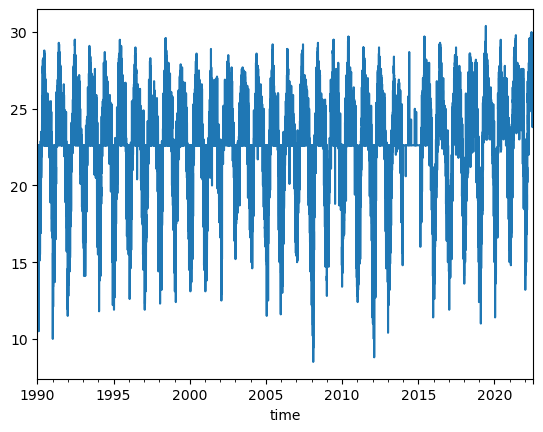

In [50]:
weather["tmin"].plot()

<Axes: xlabel='time'>

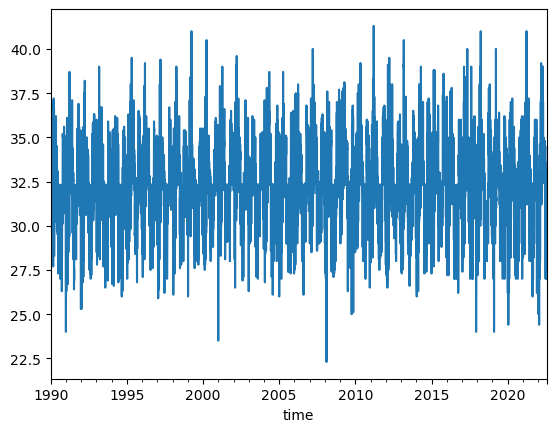

In [51]:
weather["tmax"].plot()

<Axes: xlabel='time'>

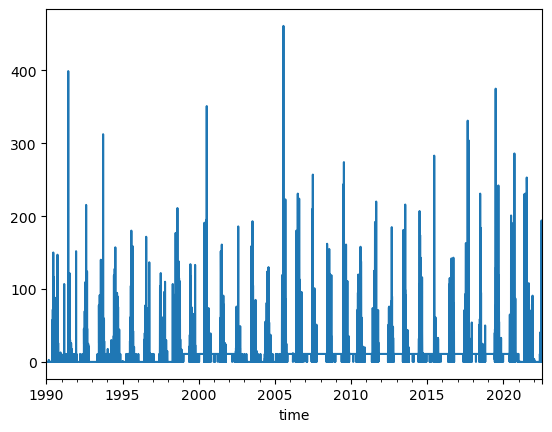

In [52]:
weather["prcp"].plot()

### Predicting the data

We are going to predict next day's max temperature

#### Setting the target variable

In [53]:
weather["target"]=weather.shift(-1)["tmax"]

In [54]:
weather.head()

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-01-01,23.2,17.0,32.31504,0.0,29.9
1990-01-02,22.2,16.5,29.90000,0.0,30.7
1990-01-03,21.8,16.3,30.70000,0.0,31.8
1990-01-04,25.4,17.9,31.80000,0.0,33.7
1990-01-05,26.5,19.3,33.70000,0.0,33.5


In [55]:
weather.tail()

,tavg,tmin,tmax,prcp,target
time,,,,,
2022-07-21,27.6,25.6,30.5,10.9,30.5
2022-07-22,28.3,26.0,30.5,3.0,31.3
2022-07-23,28.2,25.8,31.3,5.1,30.4
2022-07-24,28.1,25.6,30.4,7.1,30.2
2022-07-25,28.3,25.1,30.2,7.1,NaN


We dont have a data for 26th july thats why 25th has NaN value, so lets predict this data

Lets just fill this row with the previous value for model training, it won't cause any issue

In [78]:
weather.ffill()

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-01-01,23.2,17.0,32.31504,0.0,29.9
1990-01-02,22.2,16.5,29.90000,0.0,30.7
1990-01-03,21.8,16.3,30.70000,0.0,31.8
1990-01-04,25.4,17.9,31.80000,0.0,33.7
1990-01-05,26.5,19.3,33.70000,0.0,33.5
...,...,...,...,...,...
2022-07-20,27.4,25.0,30.50000,11.9,30.5
2022-07-21,27.6,25.6,30.50000,10.9,30.5
2022-07-22,28.3,26.0,30.50000,3.0,31.3


#### Train-test split

In [79]:
predictors = weather.columns[~weather.columns.isin(["target"])]

### Applying models

Note: when trying to estimate the error of a ml model, you can use cross validation except with time series data. With time series data, dont use future data to predict the past. So, use a special technique called back testing.

#### Backtest function

In [80]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = [] #each element in this list will be a df having precitions for 90 days
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:] #will use all rows before i to train
        test = weather.iloc[i:(i+step),:] #will use next 90 days to predict
        
        model.fit(train[predictors],train["target"])
        
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index = test.index)
        combined = pd.concat([test["target"],preds], axis=1)
        
        combined.columns = ["actual","predicted"]
        
        combined["diff"] = (combined["predicted"]-combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

#### Ridge Regression model

In [81]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1)

In [82]:
predictions = backtest(weather, rr, predictors)

In [83]:
predictions

,actual,predicted,diff
time,,,
1999-12-30,32.31504,32.644486,0.329446
1999-12-31,33.90000,32.552356,1.347644
2000-01-01,33.50000,32.718655,0.781345
2000-01-02,33.40000,33.097609,0.302391
2000-01-03,33.00000,32.542831,0.457169
...,...,...,...
2022-07-20,30.50000,30.982143,0.482143
2022-07-21,30.50000,30.980258,0.480258
2022-07-22,31.30000,31.139764,0.160236


#### Checking the accuracy

In [84]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["predicted"])

1.0552477226681984

### So our model gave a 1.05 accuracy value which means that our predicted value was only +/- from our target value